In [45]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import plotly_express as px

sns.set_theme()
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(9,10))

infection_statistics_xls = pd.ExcelFile('Rådata/Folkhalsomyndigheten_Covid19.xlsx')
vaccine_statistics_xls = pd.ExcelFile('Rådata/Folkhalsomyndigheten_Covid19_Vaccine.xlsx')

veckodata_riket = pd.read_excel(infection_statistics_xls, 'Veckodata Riket')
 
date_column = [f'{year}v{week}' for year, week in zip(veckodata_riket.loc[:,'år'], veckodata_riket.loc[:,'veckonummer'])]
# Loop through columns 'year' and 'week' and append it as a string in the format 'YYYYvWW', such as '2020v06'. 
# Using zip() lets me loop through both columns at the same time.

veckodata_riket.insert(0, 'Vecka', date_column, True) # Insert new column.
veckodata_riket = veckodata_riket.drop(['år', 'veckonummer'], axis=1) # Remove 2 columns that were merged.

<Figure size 900x1000 with 0 Axes>

## c, d, e)
Med matplotlib.pyplot och seaborn:

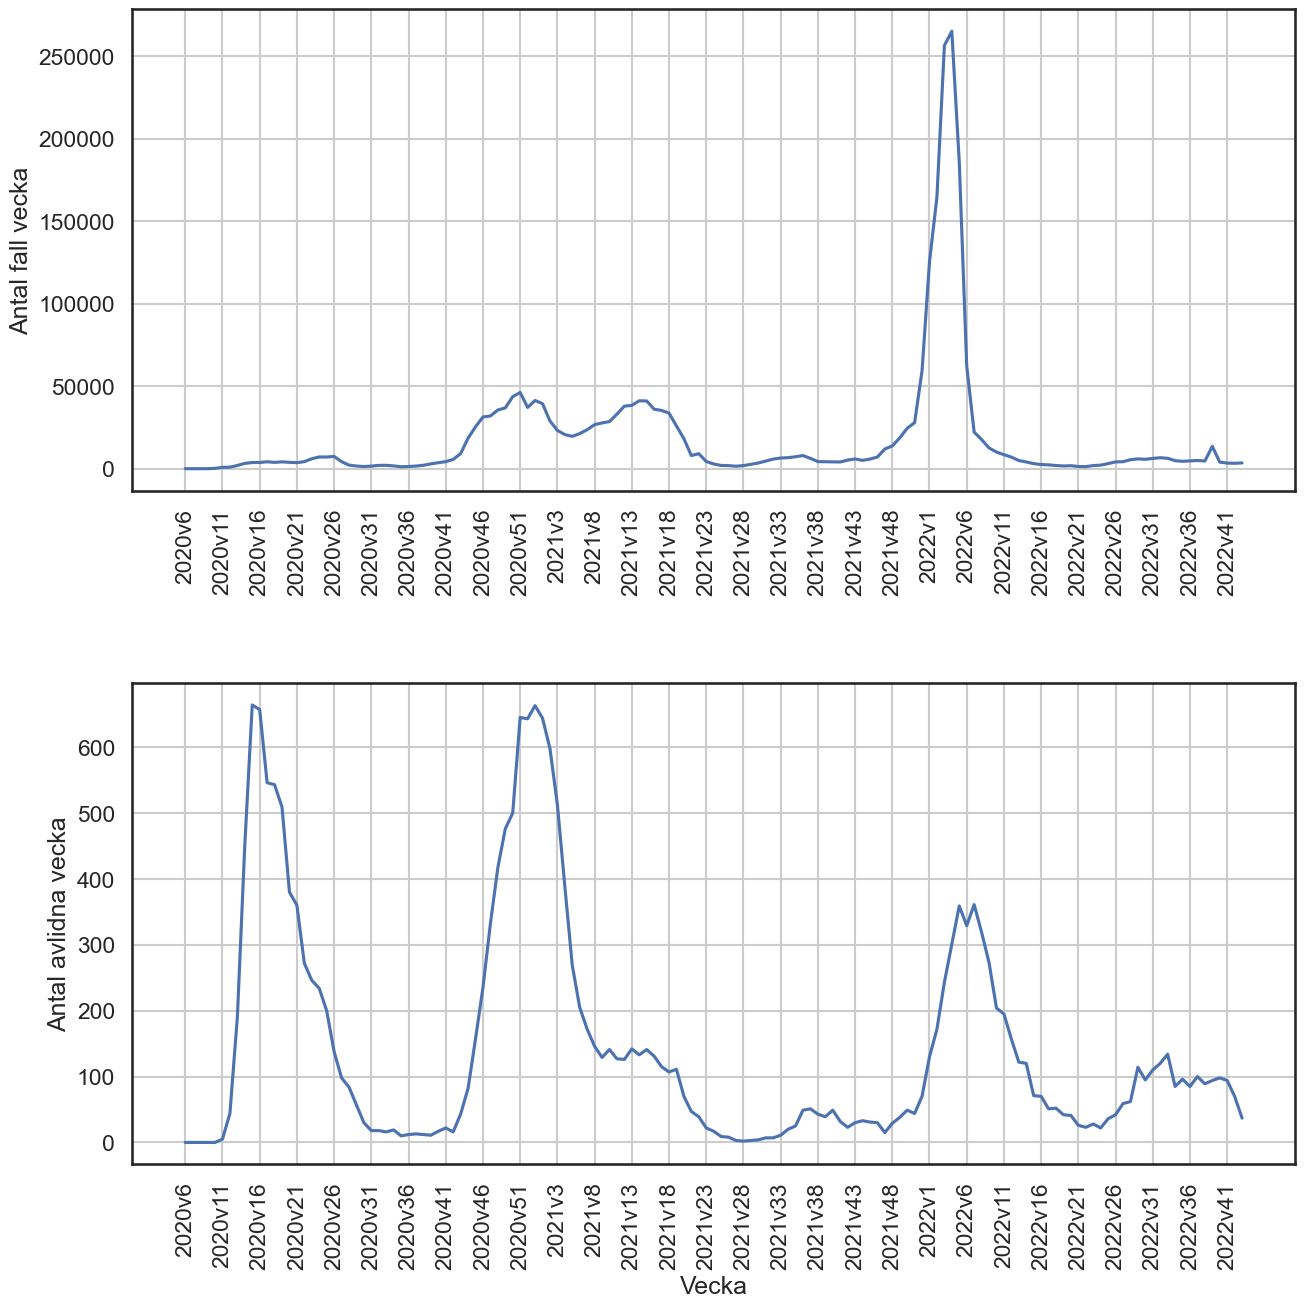

In [46]:
fig, axes = plt.subplots(2, 1, figsize=(15,15))
plt.subplots_adjust(hspace=0.4) # Set custom margin for better spacing.

sns.lineplot(veckodata_riket, x='Vecka', y='Antal_fall_vecka', ax=axes[0])
sns.lineplot(veckodata_riket, x='Vecka', y='Antal_avlidna_vecka', ax=axes[1])

veckodata_xticks = veckodata_riket.index

axes[0].set_xticks(veckodata_xticks[::5], veckodata_riket['Vecka'][::5], rotation=90) # Only show every fifth week, so it won't be so cluttered.
axes[0].set_xlabel('') # Remove x-label for first subplot.
axes[0].set_ylabel('Antal fall vecka')
axes[1].set_xticks(veckodata_xticks[::5], veckodata_riket['Vecka'][::5], rotation=90)
axes[1].set_ylabel('Antal avlidna vecka')
axes[0].grid() # Turn on grids so that it's easier to read corresponding x,y values.
axes[1].grid()
plt.show()

## f)
*Med plotly express:*

In [47]:
px.line(veckodata_riket, x='Vecka', y='Kum_antal_fall')

## Uppgift 2
# a)

In [48]:
vaccine_dataset = pd.read_excel(vaccine_statistics_xls, 'Vaccinerade kommun och ålder')
print(vaccine_dataset.size)
vaccine_dataset.head()

40600


,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,836,753,NaN,NaN,0.694929,0.625935,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4883,4464,1957.0,NaN,0.729677,0.667065,0.292439,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5550,5249,2881.0,NaN,0.756956,0.715903,0.392935,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5587,5425,3720.0,NaN,0.804348,0.781025,0.535560,NaN


In [49]:
print(f'Antal län representerade i datasetet: {vaccine_dataset["Län_namn"].nunique()}') # Counts each unique value in "län_namn"

Antal län representerade i datasetet: 21


# b)

In [50]:
print(f'Antal kommun representerade i datasetet: {vaccine_dataset["Kommun_namn"].nunique()}')

Antal kommun representerade i datasetet: 290


# c)

In [51]:
print(f'Befolknings storlek i vaccin datasetet: {vaccine_dataset["Befolkning"].sum()}')

Befolknings storlek i vaccin datasetet: 9092790


# d)

In [52]:
sum = 0
for age, amount in zip(vaccine_dataset['Ålder'], vaccine_dataset['Befolkning']):
    if age == '12-15' or age == '15-17':
        sum += amount
print(f'Antal personer som är under 18 år: {sum}')

Antal personer som är under 18 år: 503831


# e)

In [53]:
age_groups = vaccine_dataset.groupby('Ålder').sum(numeric_only=True).reset_index() # Group by age and sum populations, and then reset index so I can use 'Ålder' for the pie chart.
px.pie(age_groups, names='Ålder', values='Befolkning', title='Age distribution in Sweden')

# f)

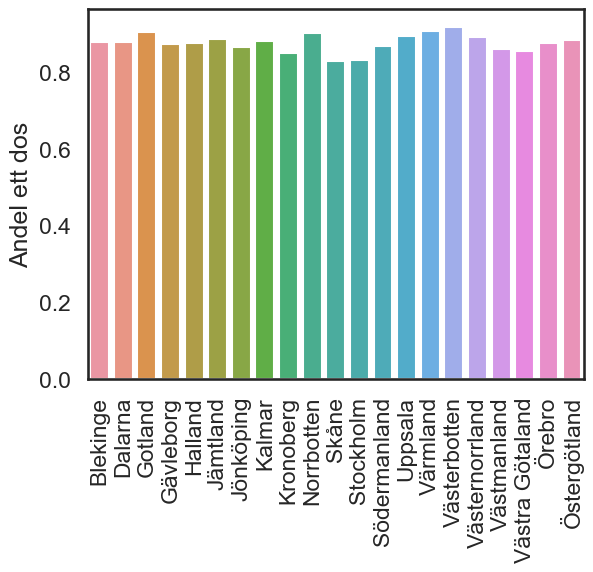

In [54]:
län_data = vaccine_dataset.groupby(['Län_namn']).sum(numeric_only=True).reset_index() # .sum() exkluderar redan NaN värden från beräkningarna, t.ex. när det inte fanns värden på antal personer som tagit 4 doser.
län_data.drop(['Län', 'Kommun', 'Andel minst 1 dos', 'Andel minst 2 doser', 'Andel 3 doser', 'Andel 4 doser'], axis=1, inplace=True) # Ta bort onödiga kolumner.

# Using pandas vectorisation.
befolkning = län_data['Befolkning']
län_data['Andel ett dos'] = län_data['Antal minst 1 dos']   / befolkning
län_data['Andel två dos'] = län_data['Antal minst 2 doser'] / befolkning
län_data['Andel tre dos'] = län_data['Antal 3 doser']       / befolkning
län_data['Andel fyra dos'] = län_data['Antal 4 doser']      / befolkning  

x_ticks = län_data.index
län_namn = [län[:-5] if län[-5] == 's' else län[:-4] for län in län_data['Län_namn']] # Ugly list comprehension to remove the 'län' in each name and trailing 's' letters.
län_data['Län_namn'] = län_namn # Change dataframe län namn to fixed names.

#https://stackoverflow.com/questions/45516770/how-do-i-omit-matplotlib-printed-output-in-python-jupyter-notebook
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
fig = sns.barplot(län_data, x='Län_namn', y='Andel ett dos')
fig.set(xlabel='') # Remove redundant x-label.
fig.set_xticks(x_ticks, län_namn, rotation=90); 

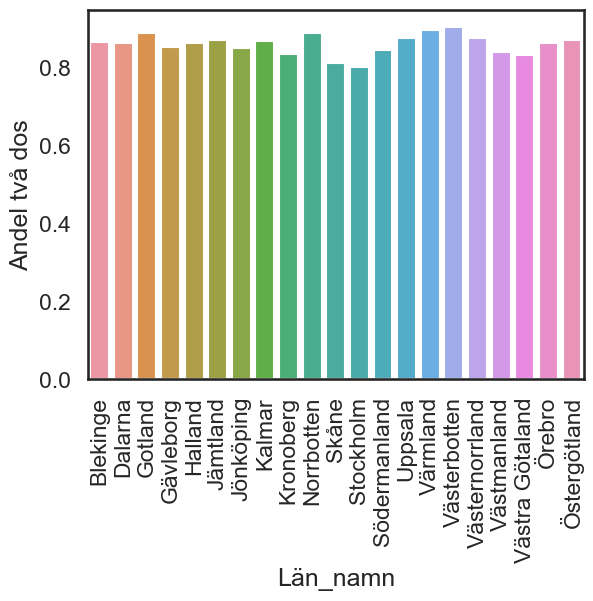

In [55]:
fig = sns.barplot(län_data, x='Län_namn', y='Andel två dos')
fig.set_xticks(x_ticks, län_namn, rotation=90);

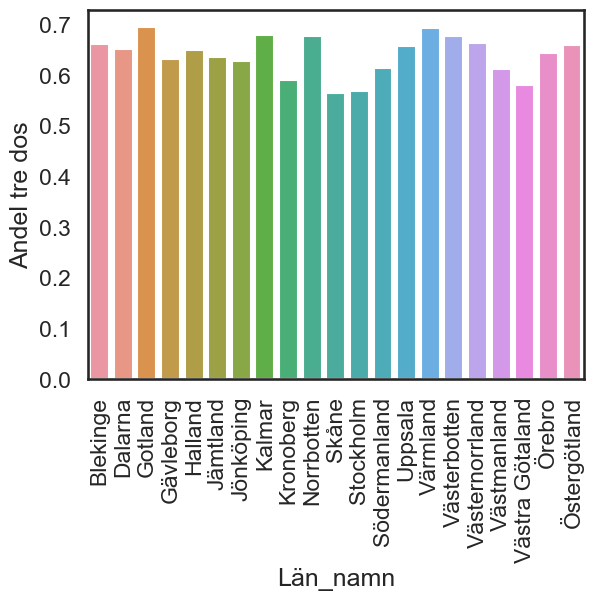

In [56]:
fig = sns.barplot(län_data, x='Län_namn', y='Andel tre dos')
fig.set_xticks(x_ticks, län_namn, rotation=90);

# g)

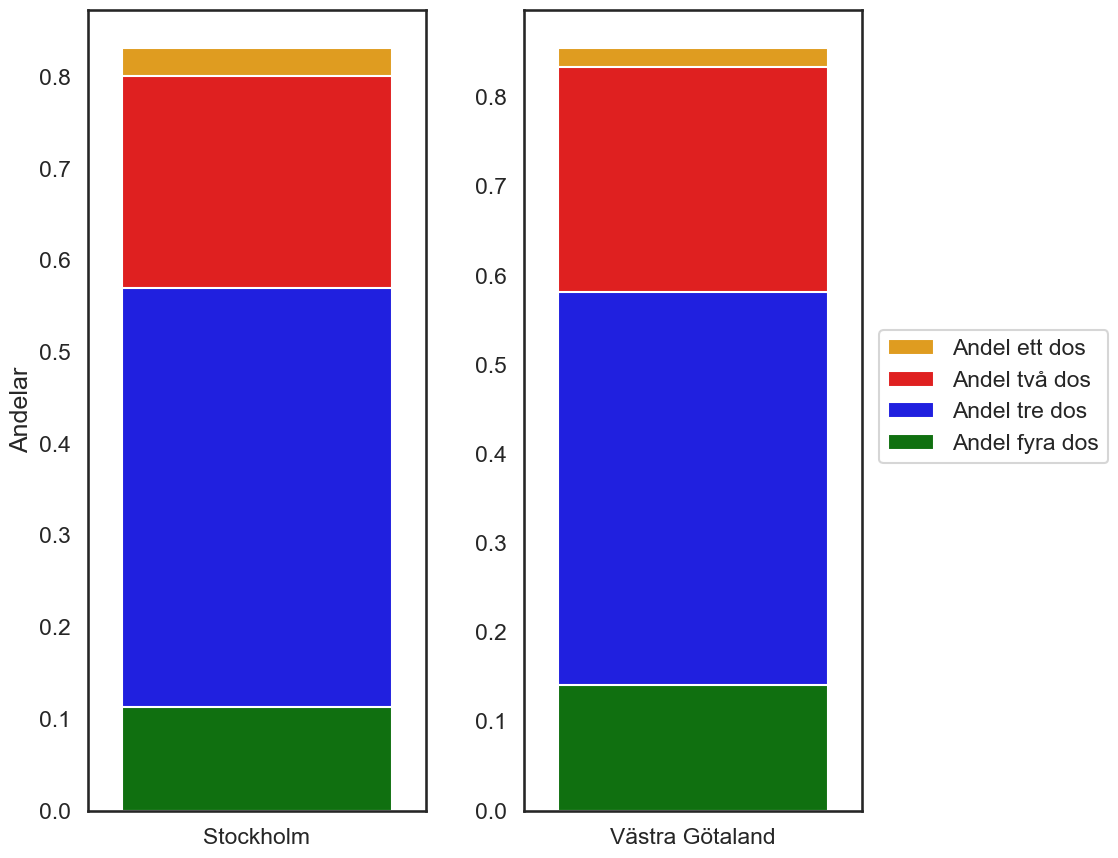

In [61]:
#https://www.statology.org/pandas-select-rows-based-on-column-values/
stockholm_info = län_data.loc[län_data['Län_namn'] == 'Stockholm'].reset_index().drop('index', axis=1)
västra_götaland_info = län_data.loc[län_data['Län_namn'] == 'Västra Götaland'].reset_index().drop('index', axis=1)

fig, axes = plt.subplots(1, 2, figsize=(9,9)) # Set a more convenient size.
plt.tight_layout()

sns.barplot(stockholm_info, x='Län_namn', y = 'Andel ett dos', color='orange' ,ax = axes[0], label = 'Andel ett dos')
sns.barplot(stockholm_info, x='Län_namn', y = 'Andel två dos', color='red'    ,ax = axes[0], label = 'Andel två dos')
sns.barplot(stockholm_info, x='Län_namn', y = 'Andel tre dos', color='blue'   ,ax = axes[0], label = 'Andel tre dos')
sns.barplot(stockholm_info, x='Län_namn', y = 'Andel fyra dos', color='green'   ,ax = axes[0], label = 'Andel fyra dos')
sns.barplot(västra_götaland_info, x='Län_namn', y = 'Andel ett dos', color='orange' ,ax = axes[1], label = 'Andel ett dos')
sns.barplot(västra_götaland_info, x='Län_namn', y = 'Andel två dos', color='red'    ,ax = axes[1], label = 'Andel två dos')
sns.barplot(västra_götaland_info, x='Län_namn', y = 'Andel tre dos', color='blue'   ,ax = axes[1], label = 'Andel tre dos')
sns.barplot(västra_götaland_info, x='Län_namn', y = 'Andel fyra dos', color='green'   ,ax = axes[1], label = 'Andel fyra dos')
axes[0].set_xlabel('')
axes[0].set_ylabel('Andelar')
axes[1].set_ylabel('')
axes[1].set_xlabel('')
# https://www.statology.org/seaborn-legend-outside/
plt.legend(bbox_to_anchor=(1.05, 0.6), loc='upper left', borderaxespad=0); # En enkel legend för att förklara hela diagrammet och få denna layout förståelig.